# `Hybrid Deep Learning Model`
## Mega Case Study

# `Part 1: Identify Frauds with SOM`

## Libraries

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

## `1) Data Preprocessing`

In [114]:
dataset = pd.read_csv("Credit_Card_Applications.csv")

In [115]:
dataset.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [116]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  690 non-null    int64  
 1   A1          690 non-null    int64  
 2   A2          690 non-null    float64
 3   A3          690 non-null    float64
 4   A4          690 non-null    int64  
 5   A5          690 non-null    int64  
 6   A6          690 non-null    int64  
 7   A7          690 non-null    float64
 8   A8          690 non-null    int64  
 9   A9          690 non-null    int64  
 10  A10         690 non-null    int64  
 11  A11         690 non-null    int64  
 12  A12         690 non-null    int64  
 13  A13         690 non-null    int64  
 14  A14         690 non-null    int64  
 15  Class       690 non-null    int64  
dtypes: float64(3), int64(13)
memory usage: 86.4 KB


### Splitting into X & y

In [117]:
X = dataset.drop("Class", axis=1).values
y = dataset["Class"].values

In [118]:
X

array([[1.5776156e+07, 1.0000000e+00, 2.2080000e+01, ..., 2.0000000e+00,
        1.0000000e+02, 1.2130000e+03],
       [1.5739548e+07, 0.0000000e+00, 2.2670000e+01, ..., 2.0000000e+00,
        1.6000000e+02, 1.0000000e+00],
       [1.5662854e+07, 0.0000000e+00, 2.9580000e+01, ..., 2.0000000e+00,
        2.8000000e+02, 1.0000000e+00],
       ...,
       [1.5675450e+07, 0.0000000e+00, 1.8830000e+01, ..., 2.0000000e+00,
        1.0000000e+02, 1.0000000e+00],
       [1.5776494e+07, 0.0000000e+00, 2.7420000e+01, ..., 2.0000000e+00,
        1.2000000e+02, 1.2000000e+01],
       [1.5592412e+07, 1.0000000e+00, 4.1000000e+01, ..., 1.0000000e+00,
        5.6000000e+02, 1.0000000e+00]])

In [119]:
y

array([0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,

### Feature Scaling

In [120]:
# Normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)

In [121]:
X

array([[8.42681467e-01, 1.00000000e+00, 1.25263158e-01, ...,
        5.00000000e-01, 5.00000000e-02, 1.21200000e-02],
       [6.96090562e-01, 0.00000000e+00, 1.34135338e-01, ...,
        5.00000000e-01, 8.00000000e-02, 0.00000000e+00],
       [3.88981656e-01, 0.00000000e+00, 2.38045113e-01, ...,
        5.00000000e-01, 1.40000000e-01, 0.00000000e+00],
       ...,
       [4.39420332e-01, 0.00000000e+00, 7.63909774e-02, ...,
        5.00000000e-01, 5.00000000e-02, 0.00000000e+00],
       [8.44034934e-01, 0.00000000e+00, 2.05563910e-01, ...,
        5.00000000e-01, 6.00000000e-02, 1.10000000e-04],
       [1.06907888e-01, 1.00000000e+00, 4.09774436e-01, ...,
        0.00000000e+00, 2.80000000e-01, 0.00000000e+00]])

## `2) Training the SOM`

In [122]:
from minisom import MiniSom # minisom is used to build SOM model

In [123]:
som = MiniSom(
    x=10, # x is the number of nodes in the x-axis
    y=10, # y is the number of nodes in the y-axis
    input_len=15, # input_len is the number of features in the dataset
    sigma=1.0, # sigma is the radius of the neighbourhood
    learning_rate=0.5
)

# Initialize the weights randomly with the values between 0 and 1
som.random_weights_init(X)

som.train_random(data=X, num_iteration=100)

## `3) Visualizing the Results`

In [124]:
from pylab import bone, pcolor, colorbar, plot, show

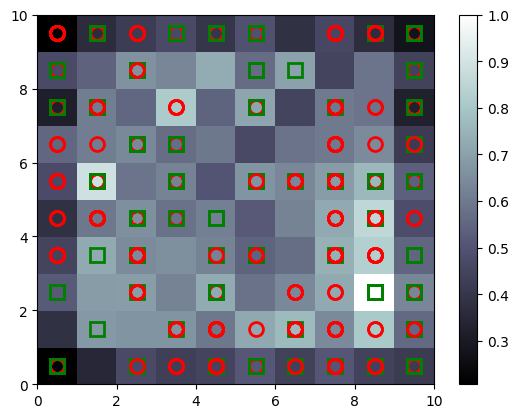

In [125]:
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ["o", "s"]
colors = ["r", "g"]
for i, x in enumerate(X):
    w = som.winner(x)  # w is the winning node
    plot(w[0]+0.5, # x-coordinate of the winning node
         w[1]+0.5, # y-coordinate of the winning node
         markers[y[i]],
         markeredgecolor=colors[y[i]],
         markerfacecolor="None",
         markersize=10,
         markeredgewidth=2
         )
show()

## `4) Finding the Frauds`

In [126]:
mappings = som.win_map(X) # dictionary of winning nodes and their respective customers
frauds = np.concatenate((mappings[(6,8)], mappings[(5,1)]), axis = 0)
frauds = scaler.inverse_transform(frauds)

In [127]:
print("Fraud Customer IDs")
for i in frauds[:, 0]:
    print(int(i))

Fraud Customer IDs
15793896
15705379


# `Part 2: Going from Unsupervised to Supervised Deep Learning`

### Creating the Matrix of Features

In [128]:
customers = dataset.drop("CustomerID", axis=1).values

### Creating the Dependent Variable

In [129]:
n = len(dataset)
is_fraud = np.zeros(n)
for i in range(n):
    if dataset.iloc[i, 0] in frauds:
        is_fraud[i] = 1

# `ANN`

### Feature Scaling

In [130]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)

## Building the ANN

### Initializing the ANN

In [131]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [132]:
ann.add(tf.keras.layers.Dense(units=2, activation="relu"))

### Adding the output layer

In [133]:
ann.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

### Compiling the ANN

In [134]:
ann.compile(optimizer="adam",
            loss="binary_crossentropy",
            metrics=["accuracy"]
            )

### Training the ANN

In [135]:
ann.fit(customers, is_fraud,
        batch_size=1,
        epochs=25,
        )

Epoch 1/25
690/690 [==============================] - 2s 3ms/step - loss: 0.5038 - accuracy: 0.8348
Epoch 2/25
690/690 [==============================] - 2s 3ms/step - loss: 0.2354 - accuracy: 0.9928
Epoch 3/25
690/690 [==============================] - 2s 3ms/step - loss: 0.1358 - accuracy: 0.9971
Epoch 4/25
690/690 [==============================] - 2s 3ms/step - loss: 0.0868 - accuracy: 0.9971
Epoch 5/25
690/690 [==============================] - 2s 3ms/step - loss: 0.0593 - accuracy: 0.9971
Epoch 6/25
690/690 [==============================] - 2s 3ms/step - loss: 0.0425 - accuracy: 0.9971
Epoch 7/25
690/690 [==============================] - 2s 3ms/step - loss: 0.0323 - accuracy: 0.9971
Epoch 8/25
690/690 [==============================] - 2s 3ms/step - loss: 0.0273 - accuracy: 0.9971
Epoch 9/25
690/690 [==============================] - 2s 3ms/step - loss: 0.0242 - accuracy: 0.9971
Epoch 10/25
690/690 [==============================] - 2s 3ms/step - loss: 0.0219 - accuracy: 0.9971

### Predicting the Test Set results

In [136]:
predictions = ann.predict(customers)
predictions = np.concatenate((dataset.iloc[:, 0:1].values, predictions), axis=1)
predictions = predictions[predictions[:, 1].argsort()]

print(predictions)

22/22 [==============================] - 0s 1ms/step
[[1.55714150e+07 3.76017661e-09]
 [1.56993400e+07 5.25948662e-09]
 [1.56844400e+07 7.28206029e-09]
 ...
 [1.57505450e+07 5.66264763e-02]
 [1.55986140e+07 7.54124820e-02]
 [1.57053790e+07 3.23938429e-01]]


In [137]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [138]:
print(accuracy_score(is_fraud, predictions[:, 1] > 0.5))
print(confusion_matrix(is_fraud, predictions[:, 1] > 0.5))
print(classification_report(is_fraud, predictions[:, 1] > 0.5))

0.9971014492753624
[[688   0]
 [  2   0]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       688
         1.0       0.00      0.00      0.00         2

    accuracy                           1.00       690
   macro avg       0.50      0.50      0.50       690
weighted avg       0.99      1.00      1.00       690



c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,